In [1]:
# Импорт библиотек
import numpy
import pandas as pd

In [2]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/USER/Documents/Python/_Python_part_2/Lecture_4_02/04_series_g")


In [5]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)


In [6]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [7]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [8]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


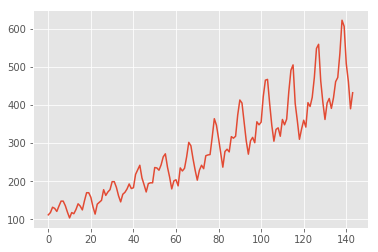

In [9]:
#  График, чтобы ответить на 4 вопроса
ser_g.iloc[:,1].plot()


In [19]:
#  Надо прогнозировать логарифм
ser_g['log_y'] = numpy.log10(ser_g['series_g'])

Text(0,0.5,'log10 от тысяч человек')

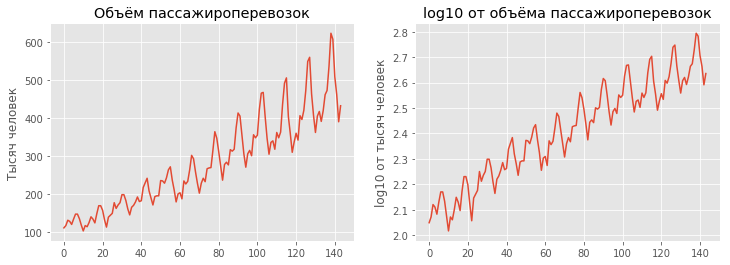

In [23]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [24]:
# Преобразуем данные

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  2.049218   
7        NaN       NaN       NaN       NaN       NaN  2.049218  2.071882   
8        NaN       NaN       NaN       NaN  2.049218  2.071882  2.120574   
9        NaN       NaN       NaN  2.049218  2.071882  2.120574  2.110590   
10       NaN       NaN  2.049218  2.071882  2.120574  2.110590  2.082785   
11       NaN  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334   
12  2.049218

In [25]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [26]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [31]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [32]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [33]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
12  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262   
13  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262   
14  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539   
15  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547   
16  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547  2.017033   

         t-5       t-4       t-3       t-2       t-1  
12  2.170262  2.133539  2.075547  2.017033  2.071882  
13  2.133539  2.075547  2.017033  2.071882  2.060698  
14  2.075547  2.017033  2.071882  2.060698  2.100371  
15  2.017033  2.071882  2.060698  2.100371  2.149219  
16  2.071882  2.060698  2.100371  2.149219  2.130334  


In [35]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [36]:
from keras.models import Sequential
from keras.layers import Dense


C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0266 - mean_absolute_percentage_error: 5.4948
Epoch 2/300
120/120 [==============================] - 0s 58us/step - loss: 0.0221 - mean_absolute_percentage_error: 4.9386
Epoch 3/300
120/120 [==============================] - 0s 75us/step - loss: 0.0115 - mean_absolute_percentage_error: 3.7549
Epoch 4/300
120/120 [==============================] - 0s 67us/step - loss: 0.0148 - mean_absolute_percentage_error: 4.2217
Epoch 5/300
120/120 [==============================] - 0s 58us/step - loss: 0.0116 - mean_absolute_percentage_error: 3.8134
Epoch 6/300
120/120 [==============================] - 0s 67us/step - loss: 0.0120 - mean_absolute_percentage_error: 3.6860
Epoch 7/300
120/120 [==============================] - 0s 83us/step - loss: 0.0107 - mean_absolute_percentage_error: 3.7046
Epoch 8/300
120/120 [==============================] - 0s 75us/step - loss: 0.0108 - mean_absolute_percentage_error: 3.7624
Epoch 9/3

120/120 [==============================] - 0s 58us/step - loss: 0.0077 - mean_absolute_percentage_error: 3.1350
Epoch 67/300
120/120 [==============================] - 0s 67us/step - loss: 0.0077 - mean_absolute_percentage_error: 3.1826
Epoch 68/300
120/120 [==============================] - 0s 58us/step - loss: 0.0073 - mean_absolute_percentage_error: 3.1013
Epoch 69/300
120/120 [==============================] - 0s 58us/step - loss: 0.0074 - mean_absolute_percentage_error: 3.0747
Epoch 70/300
120/120 [==============================] - 0s 58us/step - loss: 0.0074 - mean_absolute_percentage_error: 3.1038
Epoch 71/300
120/120 [==============================] - 0s 67us/step - loss: 0.0072 - mean_absolute_percentage_error: 3.0628
Epoch 72/300
120/120 [==============================] - 0s 67us/step - loss: 0.0072 - mean_absolute_percentage_error: 3.0758
Epoch 73/300
120/120 [==============================] - 0s 58us/step - loss: 0.0071 - mean_absolute_percentage_error: 3.0533
Epoch 74/300


120/120 [==============================] - 0s 92us/step - loss: 0.0050 - mean_absolute_percentage_error: 2.5553
Epoch 132/300
120/120 [==============================] - 0s 67us/step - loss: 0.0051 - mean_absolute_percentage_error: 2.5022
Epoch 133/300
120/120 [==============================] - 0s 58us/step - loss: 0.0048 - mean_absolute_percentage_error: 2.4383
Epoch 134/300
120/120 [==============================] - 0s 67us/step - loss: 0.0053 - mean_absolute_percentage_error: 2.6117
Epoch 135/300
120/120 [==============================] - 0s 67us/step - loss: 0.0049 - mean_absolute_percentage_error: 2.4835
Epoch 136/300
120/120 [==============================] - 0s 58us/step - loss: 0.0048 - mean_absolute_percentage_error: 2.4972
Epoch 137/300
120/120 [==============================] - 0s 67us/step - loss: 0.0048 - mean_absolute_percentage_error: 2.4310
Epoch 138/300
120/120 [==============================] - 0s 92us/step - loss: 0.0047 - mean_absolute_percentage_error: 2.4377
Epoch 

120/120 [==============================] - 0s 67us/step - loss: 0.0034 - mean_absolute_percentage_error: 2.0311
Epoch 197/300
120/120 [==============================] - 0s 67us/step - loss: 0.0033 - mean_absolute_percentage_error: 2.0142
Epoch 198/300
120/120 [==============================] - 0s 67us/step - loss: 0.0034 - mean_absolute_percentage_error: 2.0608
Epoch 199/300
120/120 [==============================] - 0s 67us/step - loss: 0.0034 - mean_absolute_percentage_error: 2.0427
Epoch 200/300
120/120 [==============================] - 0s 75us/step - loss: 0.0033 - mean_absolute_percentage_error: 2.0113
Epoch 201/300
120/120 [==============================] - 0s 58us/step - loss: 0.0033 - mean_absolute_percentage_error: 2.0409
Epoch 202/300
120/120 [==============================] - 0s 58us/step - loss: 0.0033 - mean_absolute_percentage_error: 1.9892
Epoch 203/300
120/120 [==============================] - 0s 58us/step - loss: 0.0033 - mean_absolute_percentage_error: 2.0195
Epoch 

120/120 [==============================] - 0s 75us/step - loss: 0.0026 - mean_absolute_percentage_error: 1.7356
Epoch 262/300
120/120 [==============================] - 0s 92us/step - loss: 0.0028 - mean_absolute_percentage_error: 1.8188
Epoch 263/300
120/120 [==============================] - 0s 58us/step - loss: 0.0028 - mean_absolute_percentage_error: 1.8122
Epoch 264/300
120/120 [==============================] - 0s 75us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.7352
Epoch 265/300
120/120 [==============================] - 0s 67us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.7366
Epoch 266/300
120/120 [==============================] - 0s 58us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.7481
Epoch 267/300
120/120 [==============================] - 0s 58us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6944
Epoch 268/300
120/120 [==============================] - 0s 58us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.6904
Epoch 

In [45]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

12/12 [==============================] - 0s 4ms/step

MAPE: 1.35%


In [46]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [47]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [49]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [50]:
#   было 144 наблюдений

#   отбросили 12 стало 132
#   train 120
#   test  12



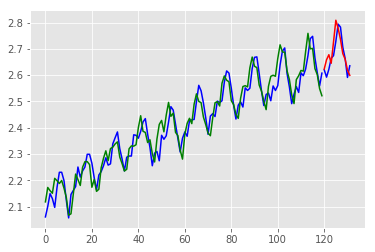

In [51]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = numpy.arange(0, 120, 1)

x3 = numpy.arange(120, 132, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



#   Внимание, недоделано!

#   1.  Есть прогноз на тестовом множестве, нет прогноза.
#   2.  Есть прогноз для логарифма, нет прогноза для исходного ряда.
#   3.  Нет окончательного графика.
#   4.  Нет спрогнозированных значений
